# Cognifyz Data Analysis Internship – Level 1


-This dataset has restaurant-level information such as location,cuisine type,ratings,votes,pricing,delivery type and availability of service.In dataset each row represents the information about single restaurant,including its location,customer ratings,price category,service availability such as online or offline,cuisine.This dataset is used to perform descriptive analysis, rating-based analysis, and geographic analysis of restaurants.It helps in understanding customer preference relate to cuisines, pricing, location, and service availability such as online delivery.


In [3]:
import pandas as pd
df = pd.read_csv('../data/dataset.csv',encoding = 'latin-1')  


In [4]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.isnull().sum()


ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
df.dtypes


ï»¿Restaurant ID          int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

# Data Cleanning

In [10]:
df = df.dropna(subset=['Cuisines'])


In [11]:
df.isnull().sum()


ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.shape

(9542, 21)

Rows with missing values in the Cuisines column were removed, as cuisine information is essential for analysis. After cleaning, the dataset contained no missing values.

# Level-1:Task-1 - Top Cuisines
This task focuses on identifying the most commonly served cuisines in the dataset and understanding their popularity among restaurants.

In [14]:
# Split cuisines into individual values
cuisine_exploded = df['Cuisines'].str.split(',').explode()

# Remove extra spaces
cuisine_exploded = cuisine_exploded.str.strip()

# Count frequency of each cuisine
top_cuisines = cuisine_exploded.value_counts()

# Display top 3 cuisines
top_cuisines.head(3)

total_restaurants = len(df)
top_3_percentage = (top_cuisines.head(3) / total_restaurants) * 100
top_3_percentage


North Indian    41.500734
Chinese         28.662754
Fast Food       20.813247
Name: Cuisines, dtype: float64

Result:
The analysis indicates that North Indian, Chinese, and Fast Food cuisines are the most commonly served in the dataset. This suggests that these cuisines are highly popular and widely preferred by customers.

# Level-1: Task-2 - City Analysis
This task focuses on analyzing restaurants based on city. 
The objective is to identify cities with the highest number of restaurants 
and to compare average restaurant ratings across different cities.

In [15]:
# Count number of restaurants in each city
city_counts = df['City'].value_counts()

# City with the highest number of restaurants
city_counts.head(1)


New Delhi    5473
Name: City, dtype: int64

In [16]:
# Calculate average rating for each city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()

city_avg_rating.head()

City
Abu Dhabi    4.300000
Agra         3.965000
Ahmedabad    4.161905
Albany       3.552941
Allahabad    3.395000
Name: Aggregate rating, dtype: float64

In [18]:
# City with highest average rating
city_avg_rating.sort_values(ascending=False).head(1)

City
Inner City    4.9
Name: Aggregate rating, dtype: float64

Result:
The analysis shows that New Delhi has the highest number of restaurants, indicating a dense food market. Additionally, Inner City has the highest average restaurant rating, suggesting better overall customer satisfaction in that city.

# Level-1: Task-3 - Price Range Distribution

This task focuses on understanding how restaurants are distributed across different price range categories. 
It also aims to calculate the percentage of restaurants falling into each price range.


In [20]:
# Count number of restaurants in each price range
price_counts = df['Price range'].value_counts().sort_index()

price_counts


1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64

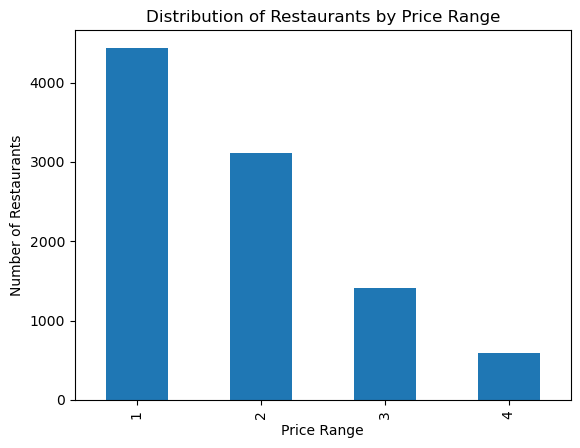

In [21]:
import matplotlib.pyplot as plt

# Bar chart for price range distribution
price_counts.plot(kind='bar')

plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Price Range')

plt.show()


In [22]:
# Calculate percentage of restaurants in each price range
price_percentage = (price_counts / len(df)) * 100

price_percentage


1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: Price range, dtype: float64

Result:
The analysis shows that most restaurants fall within the lower and mid price range categories. This indicates that affordable dining options are more common in the dataset, while fewer restaurants operate in higher price ranges.

# Level-1: Task-4 - Online Delivery

This task analyzes the availability of online delivery services among restaurants.
It also compares average restaurant ratings based on whether online delivery is offered.


In [23]:
# Count restaurants with and without online delivery
online_delivery_counts = df['Has Online delivery'].value_counts()

online_delivery_counts


No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

In [24]:
# Calculate percentage
online_delivery_percentage = (online_delivery_counts / len(df)) * 100

online_delivery_percentage


No     74.313561
Yes    25.686439
Name: Has Online delivery, dtype: float64

In [25]:
# Compare average ratings based on online delivery
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

avg_rating_delivery


Has Online delivery
No     2.463517
Yes    3.248837
Name: Aggregate rating, dtype: float64

Result:
The analysis shows the percentage of restaurants that provide online delivery services.
The comparison of average ratings indicates whether restaurants offering online delivery receive higher customer ratings compared to those that do not.

Restaurant Ratings


In [26]:
# Check distribution of aggregate ratings
rating_distribution = df['Aggregate rating'].value_counts().sort_index()

rating_distribution


0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: Aggregate rating, dtype: int64

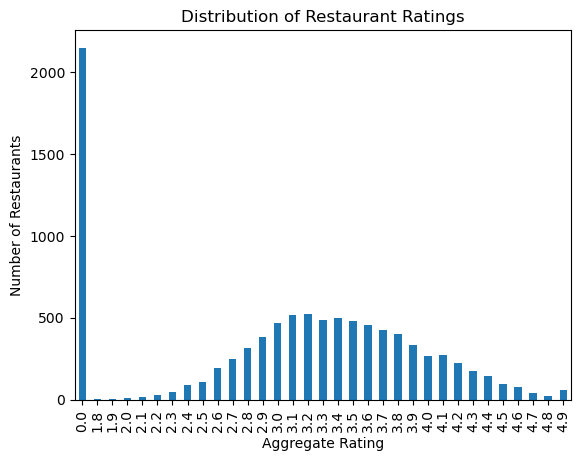

In [27]:
import matplotlib.pyplot as plt

rating_distribution.plot(kind='bar')

plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()


In [28]:
# Most common rating
rating_distribution.idxmax(), rating_distribution.max()


(0.0, 2148)

In [29]:
# Calculate average number of votes
average_votes = df['Votes'].mean()

average_votes


156.7720603647034

Result:
The rating distribution shows how restaurants are spread across different rating values. Most restaurants fall within a mid-range rating, indicating average customer satisfaction. The most common rating represents the rating frequently given by customers. Additionally, the average number of votes provides insight into customer engagement and how actively restaurants are reviewed in the dataset.